# Performing Dimentionality reduction and Feature selection using Allele frequency conservation  

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from complexcgr import CGR
from pathlib import Path

In [22]:
def one_hot_encoding_dim_reduction(df_in,category):
    dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
    snp_data = df_in.drop(columns=dropped_columns)
    print(f"The initial features are {df_in.shape[1]}")
    encoded_categorical=pd.get_dummies(snp_data,dtype=int)
    print(f"The initial features  after one hot encoding are {encoded_categorical.shape[1]}")

    # Calculate the frequency of 1 for each SNP column
    column_frequencies = encoded_categorical.mean()
    # Set a threshold for high conservation
    conservation_threshold = 0.9
    # Identify highly conserved SNP loci
    highly_conserved_loci = column_frequencies[column_frequencies > conservation_threshold]
    # Remove columns containing '_N' from highly conserved loci
    highly_conserved_filtered = highly_conserved_loci[highly_conserved_loci.index.str.contains('_N') == False]
    # Get DataFrame with the filtered columns
    filtered_columns = highly_conserved_filtered.index.tolist()
    df_filtered = encoded_categorical[filtered_columns]
    df_filtered 
    # Select informative SNP columns
    # Combine non-categorical variables with informative SNP columns
    data_combined = pd.concat([df_in[dropped_columns], df_filtered], axis=1)
    # Get the top ten conserved alleles
    data_combined.to_csv(f"{category}.csv")
    top_ten_conserved = df_filtered.mean().nlargest(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    top_ten_conserved.plot(kind='bar', color='blue')
    plt.title(f'Top Ten Conserved Alleles in {category}')
    plt.xlabel('Allele')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Save the plot as a PNG file
    plt.savefig(f'../../../salmonellaml/salmonellaml/figures/top_ten_conserved_SNP_{category}.png')
    plt.show()
    return data_combined

In [19]:
# load data
df=pd.read_csv("../data/nigeria_poultry_metadata.csv")
df

,Isolation source,category,BioSample,sra_accession,country,27,40,576,646,681,...,4486464,4745998,4746010,4746025,4746046,4746058,4746064,4746067,4746068,4746070
0,Poultry small intenstine,poultry,SAMN02368689,SRR1106403,nigeria,N,N,N,T,C,...,N,N,N,N,N,N,N,N,N,N
1,chicken,poultry,SAMN02368684,SRR1840690,nigeria,N,N,N,T,C,...,N,N,N,N,N,N,N,N,N,N
2,chicken,poultry,SAMN02368666,SRR1106413,nigeria,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
3,chicken,poultry,SAMN02368627,SRR1106442,nigeria,N,N,N,T,N,...,N,N,N,N,N,N,N,N,N,N
4,chicken,poultry,SAMN02368606,SRR1106456,nigeria,N,N,N,T,C,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Poultry vendoors and farms,poultry,SAMEA6869863,ERR4183583,nigeria,N,N,N,T,N,...,N,N,N,N,N,N,N,N,N,N
80,Poultry vendoors and farms,poultry,SAMEA6869864,ERR4183584,nigeria,N,N,N,T,C,...,N,N,N,N,N,N,N,N,N,N
81,Poultry vendoors and farms,poultry,SAMEA6869865,ERR4183585,nigeria,A,A,A,T,C,...,N,N,N,N,N,N,N,N,N,N
82,Poultry vendoors and farms,poultry,SAMEA6869866,ERR4183586,nigeria,N,N,N,T,N,...,N,N,N,N,N,N,N,N,N,N


The initial features are 245904
The initial features  after one hot encoding are 499774


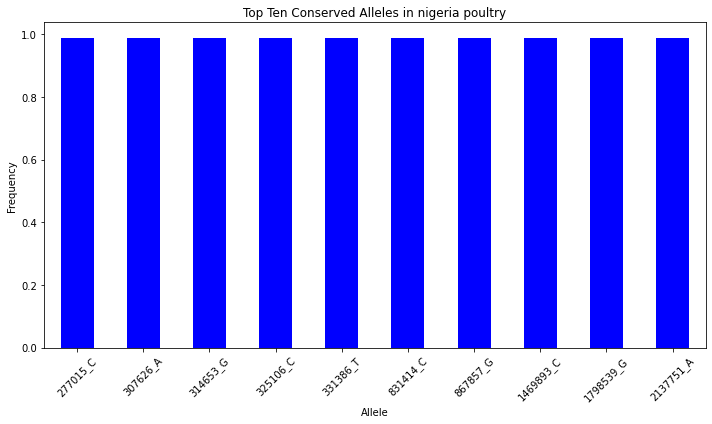

,Isolation source,category,BioSample,sra_accession,country,1647_C,2088_G,2493_G,3982_G,7166_A,...,4842615_G,4848025_T,4849403_T,4853392_A,4854303_C,4855592_A,4855670_C,4856751_C,4856784_C,831450_C
0,Poultry small intenstine,poultry,SAMN02368689,SRR1106403,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,chicken,poultry,SAMN02368684,SRR1840690,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,chicken,poultry,SAMN02368666,SRR1106413,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,chicken,poultry,SAMN02368627,SRR1106442,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,chicken,poultry,SAMN02368606,SRR1106456,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Poultry vendoors and farms,poultry,SAMEA6869863,ERR4183583,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
80,Poultry vendoors and farms,poultry,SAMEA6869864,ERR4183584,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
81,Poultry vendoors and farms,poultry,SAMEA6869865,ERR4183585,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
82,Poultry vendoors and farms,poultry,SAMEA6869866,ERR4183586,nigeria,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1


In [25]:
df_poultry=one_hot_encoding_dim_reduction(df,"nigeria poultry")
df_poultry

In [ ]:
# load data
df_pig=pd.read_csv("../data/nigeria_poultry_metadata.csv")
df_pig=one_hot_encoding_dim_reduction(df,"nigeria poultry")
df_pig